# **ФАКТОРНЫЙ_АНАЛИЗ_4**(моё)

In [ ]:
!pip install factor_analyzer

     |████████████████████████████████| 41 kB 579 kB/s 
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.0-py3-none-any.whl size=41455 sha256=875e68f1f34cc6b7a05665d9d55f237742a837244e016c1832946ed35205ddec
  Stored in directory: /root/.cache/pip/wheels/ac/00/37/1f0e8a5039f9e9f207c4405bbce0796f07701eb377bfc6cc76
Successfully built factor-analyzer


In [ ]:
import os
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer import factor_analyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-200')

In [ ]:
df=pd.read_csv('stickleback.csv',sep=';',decimal=',')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=df.filter(regex='^(?!.*Unnamed).*$')
df.head()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,79.0,25.0,0.0,0.0,15.0,0.0,45.0
1,136.0,58.0,6.0,0.0,15.0,0.0,148.0
2,115.0,30.0,2.0,1.0,9.0,5.0,29.0
3,129.0,139.0,16.0,0.0,22.0,0.0,69.0
4,120.0,58.0,15.0,15.0,14.0,82.0,9.0


In [ ]:
df.describe()

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000
mean,131.185185,69.055556,7.277778,1.425926,18.425926,34.259259,89.314815
std,50.771064,43.428283,6.693891,3.000641,8.712606,56.491170,98.679742
min,41.000000,3.000000,0.000000,0.000000,5.000000,0.000000,6.000000
25%,99.000000,34.250000,2.250000,0.000000,14.000000,0.000000,23.500000
50%,127.000000,60.000000,5.000000,0.000000,16.000000,0.000000,45.000000
75%,156.750000,84.250000,10.750000,1.000000,24.750000,73.000000,125.000000
max,277.000000,175.000000,26.000000,15.000000,46.000000,199.000000,306.000000


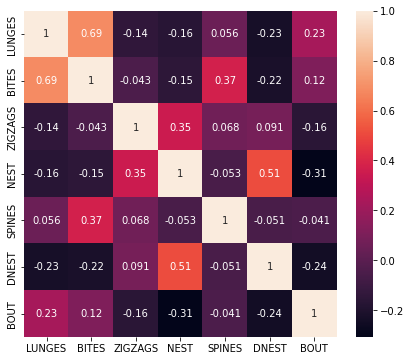

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(7,6))
sns.heatmap(df.corr(), annot = True)
plt.show()

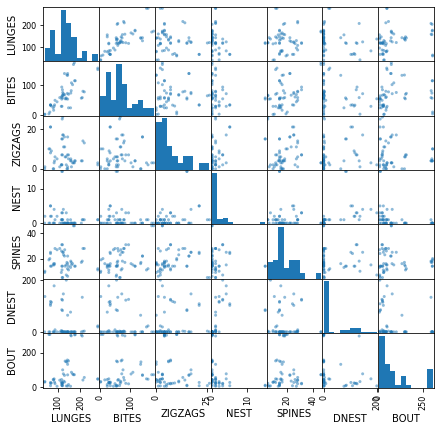

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df,figsize=(7,7))
plt.show()

**критерий сферичности Бартлетта**

In [ ]:
# критерий сферичности Бартлетта
# проверяет отличие нашей матрицы от единичной

In [ ]:
chi,p_value = calculate_bartlett_sphericity(df)
chi,p_value

(85.17614839099767, 1.0820712955339398e-09)

In [ ]:
# p_value  получиласть очень маленькая, а это значит что [0]гипотеза о равенстве
# нашей матрицы и единичной отвергаетсся, а это значит что корреляция м-ду
# нашимимпризнаками присутствует и ФА пможно проводить

**мера адекватности выборки Кайзера-Мейера-Олкина**

In [ ]:
# мера адекватности выборки Кайзера-Мейера-Олкина, т.е.
# если значение от 0 до 0.4999, то факторный анализ для данного набора данных
# проводить не стоит, если от 0.5 до 1, факторный анализ проводить можно

In [ ]:
kmo_all,kmo_model = calculate_kmo(df)
kmo_all,kmo_model

(array([0.49517671, 0.48565545, 0.53685554, 0.57271819, 0.33768629,
        0.61639292, 0.76130941]), 0.5267816347722194)

# **Раздел 2. Выделение первоначальных факторов методом главных компонент**

In [ ]:
# стандартизируем преременные
df_scaled = preprocessing.scale(df)
df_scaled[0:5,:]

array([[-1.03750432, -1.02396939, -1.09743575, -0.47966932, -0.39690707,
        -0.61214787, -0.4532939 ],
       [ 0.09572432, -0.25696079, -0.19267956, -0.47966932, -0.39690707,
        -0.61214787,  0.60028766],
       [-0.32178097, -0.90775596, -0.79585035, -0.14327785, -1.09203081,
        -0.52280737, -0.61695706],
       [-0.04344411,  1.62569667,  1.31524742, -0.47966932,  0.41407062,
        -0.61214787, -0.20779917],
       [-0.22237495, -0.25696079,  1.16445472,  4.56620276, -0.51276103,
         0.85303633, -0.82153601]])

In [ ]:
pd.set_option('precision', 3)

In [ ]:
df_scaled[0:5,:]

array([[-1.03750432, -1.02396939, -1.09743575, -0.47966932, -0.39690707,
        -0.61214787, -0.4532939 ],
       [ 0.09572432, -0.25696079, -0.19267956, -0.47966932, -0.39690707,
        -0.61214787,  0.60028766],
       [-0.32178097, -0.90775596, -0.79585035, -0.14327785, -1.09203081,
        -0.52280737, -0.61695706],
       [-0.04344411,  1.62569667,  1.31524742, -0.47966932,  0.41407062,
        -0.61214787, -0.20779917],
       [-0.22237495, -0.25696079,  1.16445472,  4.56620276, -0.51276103,
         0.85303633, -0.82153601]])

In [ ]:
pca = PCA(n_components=7)

In [ ]:
pca.fit(df_scaled)

PCA(n_components=7)

In [ ]:
pca.explained_variance_

array([2.33131423, 1.48167964, 0.99758804, 0.90279779, 0.76745194,
       0.41244602, 0.2387978 ])

In [ ]:
pca.explained_variance_ratio_

array([0.32687739, 0.20774873, 0.13987346, 0.12658276, 0.1076057 ,
       0.05782973, 0.03348223])

возьмем первые 3 значения

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(df_scaled)

PCA(n_components=3)

In [ ]:
pca.explained_variance_

array([2.33131423, 1.48167964, 0.99758804])

# **Раздел 3. Факторный анализ**

In [ ]:
pca = PCA(n_components=3)

In [ ]:
pca.fit(df_scaled)

PCA(n_components=3)

In [ ]:
fa = FactorAnalysis(n_components=3)

In [ ]:
fa.fit(df_scaled)

FactorAnalysis(n_components=3)

In [ ]:
pd.DataFrame(fa.components_,columns=df.columns)
# таблица корреляции указывает коэффициент корреляции м-ду фактором и данными в таблице

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.715,0.957,-0.086,-0.241,0.359,-0.282,0.167
1,-0.019,0.099,0.368,0.849,0.073,0.514,-0.330


In [ ]:
# оставили 2 фактора, т.к. последний ни с одним из признаков сильно не коррелируется

In [ ]:
fa = FactorAnalysis(n_components=2)

In [ ]:
fa.fit(df_scaled)

FactorAnalysis(n_components=2)

In [ ]:
pd.DataFrame(fa.components_,columns=df.columns)

,LUNGES,BITES,ZIGZAGS,NEST,SPINES,DNEST,BOUT
0,0.715,0.957,-0.086,-0.241,0.359,-0.282,0.167
1,-0.019,0.099,0.368,0.849,0.073,0.514,-0.330


In [ ]:
pd.Series(fa.noise_variance_,df.columns)

LUNGES     0.488
BITES      0.076
ZIGZAGS    0.857
NEST       0.223
SPINES     0.866
DNEST      0.656
BOUT       0.863
dtype: float64

In [ ]:
scores = pd.DataFrame(fa.transform(df_scaled),columns=['f1','f2'])
scores.head()

,f1,f2
0,-0.939,-0.776
1,-0.159,-0.591
2,-0.819,-0.458
3,1.444,0.095
4,-0.639,3.662
